<a href="https://colab.research.google.com/github/shireesha27/demo/blob/master/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries for operations
# Python program using numpy for arranging a given set of data into a table
import pandas as pd
import numpy as np
# Python program using Matplotib for forming a linear plot
import matplotlib.pyplot as plt
# Packages for data preparation
# Keras is the neural network library
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
# Packages for modeling
from keras import layers
from keras.models import Sequential


In [2]:
# Reading the data from IMDB dataset
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
# Printing the data
print(df.head())

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [3]:
sentences = df['review'].values
y = df['label'].values
# Tokenizing data
tokenizer = Tokenizer(num_words=2000)
# Build the word index
tokenizer.fit_on_texts(sentences)
# Getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [4]:
# Converting the target classes to numbers
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
# Splitting the data set into test and train data
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
# defining input_dim
input_dim=np.prod(X_train.shape[1:]) 
# Number of features
print(input_dim)

2000


In [5]:
# Create the model
model = Sequential()
# Hidden layer has 300 neurons and RELU function is used to activating the hidden layer.
model.add(layers.Dense(300,input_dim= input_dim, activation='relu'))
# Changing number of neuron to 3 as we have only two labels Pos and Neg and Sup
# The activation layer is set to softmax as it works best for the multi class classification
model.add(layers.Dense(3, activation='softmax'))
# Compiling the model 
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 6s 19ms/step - loss: 0.8804 - acc: 0.5036 - val_loss: 0.8424 - val_acc: 0.5110
Epoch 2/5
293/293 [==============================] - 5s 18ms/step - loss: 0.7914 - acc: 0.5781 - val_loss: 0.8476 - val_acc: 0.5107
Epoch 3/5
293/293 [==============================] - 5s 18ms/step - loss: 0.6862 - acc: 0.6800 - val_loss: 0.8763 - val_acc: 0.5169
Epoch 4/5
293/293 [==============================] - 6s 19ms/step - loss: 0.4910 - acc: 0.8186 - val_loss: 0.9507 - val_acc: 0.5050
Epoch 5/5
293/293 [==============================] - 5s 18ms/step - loss: 0.2813 - acc: 0.9290 - val_loss: 1.0770 - val_acc: 0.5034


In [6]:
# Calculating the accuracy of the fitted model on the testing data set.
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
print(history.history.keys())

782/782 [==============================] - 2s 2ms/step - loss: 1.0770 - acc: 0.5034
Evaluation result on Test Data : Loss = 1.0769912004470825, accuracy = 0.5034000277519226
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


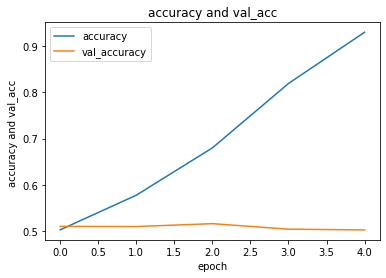

In [7]:
## Analyze by visualizing data
# Summarize history for an accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy and val_acc')
plt.ylabel('accuracy and val_acc ')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'], loc='upper left')
plt.show()

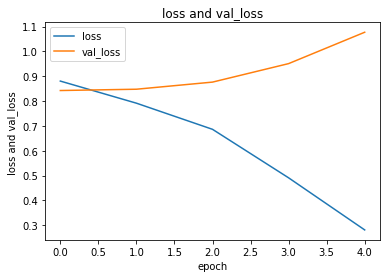

In [8]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss and val_loss')
plt.ylabel('loss and val_loss ')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

In [10]:
# Packages for data preparation
from keras.layers import Embedding, Flatten
from keras.preprocessing.sequence import pad_sequences

sentences = df['review']

In [11]:
max_review_len = max([len(s.split()) for s in sentences])
vocab_size = len(tokenizer.word_index)+1
# Getting the vocabulary of data
sentences = tokenizer.texts_to_sequences(sentences)
# Padding the sequence for shorter reviews
padded_docs = pad_sequences(sentences,maxlen=max_review_len)
# Converting the target classes to numbers
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
# Splitting the data set into test and train data
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
# Create a model
emb_model = Sequential()
# Keras provides an Embedding layer which helps us to train specific word embeddings based on our training data
# It will convert the words in our vocabulary to multi-dimensional vectors
emb_model.add(Embedding(vocab_size, 50, input_length=max_review_len))
emb_model.add(Flatten())
# Hidden layer has 300 neurons and RELU function is used to activating the hidden layer
emb_model.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
# Output layer has 3 neurons and softmax function is used to multi class classification
emb_model.add(layers.Dense(3, activation='softmax'))
# Compile the model
emb_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
# Batch_size- Size of the batches used in the mini-batch gradient descent
emb_history= emb_model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 427s 1s/step - loss: 1.0651 - acc: 0.4936 - val_loss: 0.8941 - val_acc: 0.4994
Epoch 2/5
293/293 [==============================] - 435s 1s/step - loss: 0.8646 - acc: 0.5066 - val_loss: 0.8604 - val_acc: 0.5047
Epoch 3/5
293/293 [==============================] - 437s 1s/step - loss: 0.8331 - acc: 0.5230 - val_loss: 0.8613 - val_acc: 0.4985
Epoch 4/5
293/293 [==============================] - 440s 2s/step - loss: 0.7955 - acc: 0.5545 - val_loss: 0.8691 - val_acc: 0.4995
Epoch 5/5
293/293 [==============================] - 440s 2s/step - loss: 0.7328 - acc: 0.6061 - val_loss: 0.9065 - val_acc: 0.4975


In [15]:
# Calculating the accuracy of the fitted model on the test data set.
[test_loss, test_acc] = emb_model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
print(emb_history.history.keys())

782/782 [==============================] - 52s 67ms/step - loss: 0.9065 - acc: 0.4975
Evaluation result on Test Data : Loss = 0.9065290093421936, accuracy = 0.49748000502586365
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


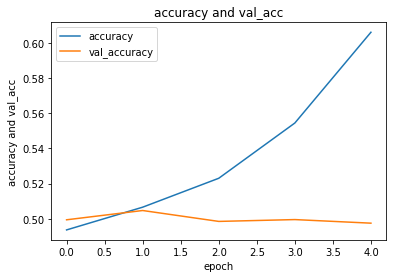

In [16]:
# Analyze by visualizing data
# Summarize history for an accuracy
plt.plot(emb_history.history['acc'])
plt.plot(emb_history.history['val_acc'])
plt.title('accuracy and val_acc')
plt.ylabel('accuracy and val_acc')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'], loc='upper left')
plt.show()

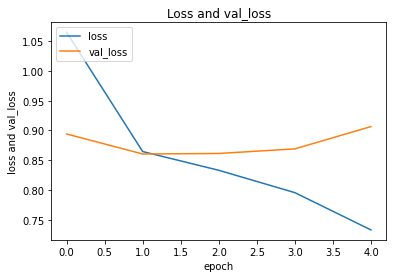

In [20]:
# Summarize history for loss
plt.plot(emb_history.history['loss'])
plt.plot(emb_history.history['val_loss'])
plt.title('Loss and val_loss')
plt.ylabel('loss and val_loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

In [21]:
# Packages for data preparation
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences = newsgroups_train.data
y = newsgroups_train.target

In [24]:
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
# Getting the vocabulary of data
sentences = tokenizer.texts_to_sequences(sentences)
# Padding the sequence for shorter reviews
padded_docs= pad_sequences(sentences,maxlen=max_review_len)
# Converting the target classes to numbers
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
# Splitting the data set into test and train data
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
# Create a model
emb_model2 = Sequential()
# Keras provides an Embedding layer which helps us to train specific word embeddings based on our training data
# It will convert the words in our vocabulary to multi-dimensional vectors
emb_model2.add(Embedding(vocab_size, 50, input_length=max_review_len))
emb_model2.add(Flatten())
# Hidden layer has 300 neurons and RELU function is used to activating the hidden layer
emb_model2.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
# Output layer has 20 neurons and softmax function is used to multi class classification
emb_model2.add(layers.Dense(20, activation='softmax'))
# Compiling the model
emb_model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
historynew= emb_model2.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
34/34 [==============================] - 226s 7s/step - loss: 10.9150 - acc: 0.0524 - val_loss: 3.2423 - val_acc: 0.0778
Epoch 2/5
34/34 [==============================] - 228s 7s/step - loss: 3.0255 - acc: 0.0853 - val_loss: 2.9018 - val_acc: 0.0923
Epoch 3/5
34/34 [==============================] - 227s 7s/step - loss: 2.8011 - acc: 0.1595 - val_loss: 2.8032 - val_acc: 0.1393
Epoch 4/5
34/34 [==============================] - 229s 7s/step - loss: 2.6181 - acc: 0.2270 - val_loss: 2.6752 - val_acc: 0.1605
Epoch 5/5
34/34 [==============================] - 227s 7s/step - loss: 2.3576 - acc: 0.3413 - val_loss: 2.5208 - val_acc: 0.2103


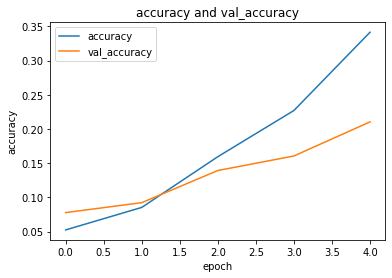

In [27]:
# Analyze by visualizing data
# Summarize history for an accuracy
plt.plot(historynew.history['acc'])
plt.plot(historynew.history['val_acc'])
plt.title('accuracy and val_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'], loc='upper left')
plt.show()

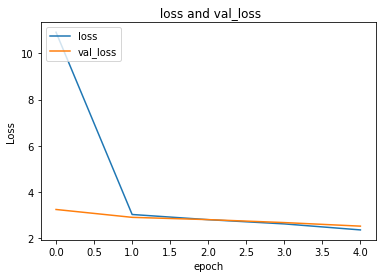

In [28]:
# Summarize history for loss
plt.plot(historynew.history['loss'])
plt.plot(historynew.history['val_loss'])
plt.title(' loss and val_loss')
plt.ylabel('Loss ')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

In [30]:
# predicting over one of the sample data
print("Actual Value:",y_test[4],"Predicted Value",emb_model2.predict_classes(X_test[[4],:]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Actual Value: 4 Predicted Value [5]
